In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
% autoreload 2

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
import sys
sys.path.append('/users/amyskerry/documents/projects')
from pybq import core, util, bqdf

In [8]:
#connect to project via project_id
project_id = 'durable-footing-95814'
client = core.bigquery_connect(project_id=project_id)

In [9]:
tablename = '[fh-bigquery:reddit.subreddits]' #format: project:dataset.tablename
#if dataset in current project_id, just dataset.tablename

# Dataframe-ish abstraction for bigquery table

In [10]:
#create bqdb table connection
df1 = bqdf.BQDF(client, tablename)
df2 = bqdf.BQDF(client, '[fh-bigquery:reddit.top20]')

In [11]:
# view columns
df1.col_names

[u'subr',
 u'created_utc',
 u'score',
 u'num_comments',
 u'c_posts',
 u'ups',
 u'downs']

In [9]:
# view schema details
df1.table_schema

[{u'mode': u'NULLABLE', u'name': u'subr', u'type': u'STRING'},
 {u'mode': u'NULLABLE', u'name': u'created_utc', u'type': u'TIMESTAMP'},
 {u'mode': u'NULLABLE', u'name': u'score', u'type': u'INTEGER'},
 {u'mode': u'NULLABLE', u'name': u'num_comments', u'type': u'INTEGER'},
 {u'mode': u'NULLABLE', u'name': u'c_posts', u'type': u'INTEGER'},
 {u'mode': u'NULLABLE', u'name': u'ups', u'type': u'INTEGER'},
 {u'mode': u'NULLABLE', u'name': u'downs', u'type': u'INTEGER'}]

Table Schema for [fh-bigquery:reddit.subreddits]
subr (STRING) :   mode-NULLABLE
created_utc (TIMESTAMP) :   mode-NULLABLE
score (INTEGER) :   mode-NULLABLE
num_comments (INTEGER) :   mode-NULLABLE
c_posts (INTEGER) :   mode-NULLABLE
ups (INTEGER) :   mode-NULLABLE
downs (INTEGER) :   mode-NULLABLE


In [10]:
#number of rows
df1.table_length

2499

In [11]:
df1.unique('subr')

array(['Winnipeg', 'winterporn', 'wisconsin', ..., 'windowshots',
       'windowsphone', 'wine'], dtype=object)

SELECT subr FROM [fh-bigquery:reddit.subreddits] GROUP BY subr


In [14]:
df1.sum('score')

388468674

In [15]:
df1.mean('score')

155449.64945978392

In [16]:
df1.std('score')

349534.8891608803

In [17]:
df1.mode('score')

2

In [18]:
df1.max('score')

3752388

In [19]:
merged=df1.join(df2, on='subr', how='inner')

SELECT * FROM [fh-bigquery:reddit.subreddits] df1 inner JOIN [fh-bigquery:reddit.top20] df2 ON df1.subr=df2.subr


In [20]:
merged

,df1_subr,df1_created_utc,df1_score,df1_num_comments,df1_c_posts,df1_ups,df1_downs,df2_subr,df2_sum_score
0,worldnews,1245520828,2876818,1520393,1000,12232641,9355823,worldnews,2876818
1,WTF,1222835012,2665757,1138484,1000,15478789,12813032,WTF,2665757
2,funny,1221430088,3713684,838031,1000,29943636,26229952,funny,3713684
3,gaming,1253397497,2633408,976844,1000,16049758,13416350,gaming,2633408
4,gifs,1308299210,2615749,267366,1000,11088214,8472465,gifs,2615749
5,mildlyinteresting,1339002701,2487454,220753,1000,7632646,5145192,mildlyinteresting,2487454
6,cringepics,1353378477,2320307,310899,999,4956013,2635706,cringepics,2320307
7,pics,1232129032,3752388,1119747,1000,28512455,24760067,pics,3752388
8,politics,1213054866,3157350,1529645,999,12994846,9837496,politics,3157350
9,reactiongifs,1329098282,2320331,127718,1000,5915530,3595199,reactiongifs,2320331


# tility functions for accessing available data

In [12]:
service=util.get_service()

In [24]:
util.list_projects(service)

Project list:
cragcrunch: durable-footing-95814
eeg4kaggle: eeg4kaggle
khan: khan-992
testing: silent-octagon-92616


In [33]:
util.list_datasets(service, 'durable-footing-95814')

Dataset list:
climbdb_bigquery


In [34]:
util.list_tables(service, 'eeg4kaggle', 'eeg')

Tables list:
labels_df
temp
temp2
test_df
train_df


In [36]:
util.delete_table(service, 'eeg4kaggle', 'eeg', 'temp2')

In [37]:
util.list_tables(service, 'eeg4kaggle', 'eeg')

Tables list:
labels_df
temp
test_df
train_df


In [25]:
#execute arbitrary sql commands and return as df
querystr = """
SELECT * FROM %s  LIMIT 1000
""" %tablename
df, source = bqdf.bigquery_query(querystr, client)

Waiting on bqjob_r67e76353314de008_0000014e887c14a8_33 ... (0s) Current status: DONE   


In [26]:
df.head()

,subr,created_utc,score,num_comments,c_posts,ups,downs
0,Winnipeg,1271800307,35017,23782,1000,41170,6153
1,winterporn,1322432778,61256,1858,1000,66831,5575
2,wisconsin,1288755087,71500,24893,999,87718,16218
3,woahdude,1272095272,2089822,126829,1000,4970101,2880279
4,women,1221247390,63478,12128,1000,74948,11470


In [27]:
util.stringify(source)

u'durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon13935229ddcce8f5c2e971ed58f82487a3382998'

In [28]:
tablename='[durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon13935229ddcce8f5c2e971ed58f82487a3382998]'

In [29]:
tdf = bqdf.BQDF(client, tablename)

In [30]:
tdf.col_names

[u'subr',
 u'created_utc',
 u'score',
 u'num_comments',
 u'c_posts',
 u'ups',
 u'downs']

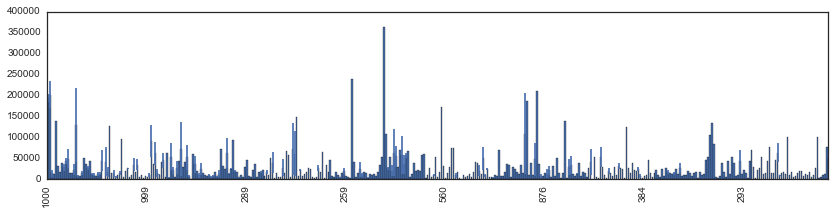

SELECT c_posts, COUNT(*) count, AVG(score) score_mean , STDDEV(score) score_std , COUNT(score) score_count  FROM [fh-bigquery:reddit.subreddits] GROUP BY c_posts LIMIT 10000000


In [31]:
value_col='score'
grouping_col='c_posts'
df1.plot(grouping_col, value_col, kind='bar')

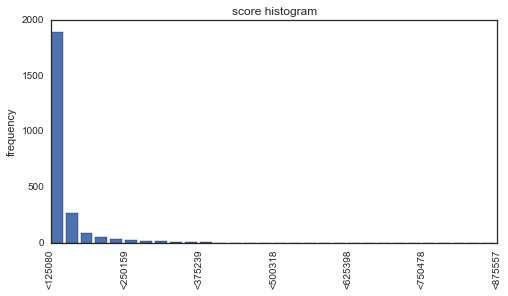

Waiting on bqjob_r1e5fab0c171321cb_0000014e887cd676_77 ... (0s) Current status: DONE   


In [34]:
histdf=df1.hist('score', bins=30)

In [33]:
df1.describe()

,c_posts,downs,num_comments,score,ups
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
min,1.000000,5.000000,0.000000,0.000000,2.000000
25th percentile,998.000000,3394.000000,5246.000000,17573.000000,20659.000000
50th percentile,1000.000000,7686.000000,13268.000000,41837.000000,50101.000000
75th percentile,1000.000000,20081.000000,27698.000000,116226.000000,133010.000000
max,1000.000000,26229952.000000,8082530.000000,3752388.000000,29943636.000000
mean,907.201681,146470.777911,38274.599840,155449.649460,301906.845538
std,218.490716,1113991.053720,191561.184023,349534.889161,1395142.130842
mode,1730.000000,3.000000,3.000000,2.000000,3.000000
